<!-- #### Download SWOT L2 HR data 
- swot_l2_hr_pixc data
- swot_l2_hr_raster data -->


#### Data search and downloading using api tool.

In [1]:
import os 
import earthaccess
import numpy as np
from glob import glob
import xarray as xr
import geopandas as gpd
import contextily as ctx
from shapely import simplify
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show
import cartopy.crs as ccrs


/Users/luo/miniconda3/envs/yn-lake/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# dir_pixc = 'data/swot_l2/pixc/dianchi-lake'
dir_data = 'data/swot_l2/raster/dianchi-lake'
## the lake vector is derived by watnet and manually corrected
path_region_vec = 'data/lakes-vec/dianchi_s2_20240415.gpkg'  


In [3]:
region_gpd = gpd.read_file(path_region_vec)
## download by polygon, sometimes it is not working
# region_geo = simplify(region_gpd.union_all(), tolerance=0.001)  # 
# x = region_geo.exterior.coords.xy[0].tolist()
# y = region_geo.exterior.coords.xy[1].tolist()
# region_coords = list(zip(x, y))
# region_coords = region_coords[::-1]  ## counter-clockwise order
# len(region_coords)


In [4]:
auth = earthaccess.login()


<!-- ##### 1. swot_l2_hr_pixc data (main data) -->


##### Downloading using api is slow. the alternative solution is downloading from earthdata website.



In [ ]:
# time_range = ('2023-01-01 00:00:00', '2024-12-31 23:59:59')  ## temporal range.
time_range = ('2024-09-01 00:00:00', '2024-10-31 23:59:59')  ## temporal range.
links_list = []
# product_name = 'SWOT_L2_HR_PIXC_2.0'  ## SWOT Level 2 High Resolution Pixel Cloud product
product_name = 'SWOT_L2_HR_Raster_2.0'
data_results = earthaccess.search_data(short_name = product_name, 
                                    temporal = time_range,
                                    bounding_box = region_gpd.union_all().bounds,
                                    # polygon=region_coords,
                                    )
for r in range(len(data_results)):
    lake_link = earthaccess.results.DataGranule.data_links(data_results[r], access='external')[0]
    links_list.append(lake_link)
# print('number of files:', len(links_list))
# earthaccess.download(links_list, dir_data)


QUEUEING TASKS | : 100%|██████████| 52/52 [00:00<00:00, 16079.61it/s]
PROCESSING TASKS | : 100%|██████████| 52/52 [00:00<00:00, 255990.38it/s]
COLLECTING RESULTS | : 100%|██████████| 52/52 [00:00<00:00, 734356.26it/s]


['data/swot_l2/raster/dianchi-lake/SWOT_L2_HR_Raster_250m_UTM48R_N_x_x_x_020_396_056F_20240903T185014_20240903T185035_PIC0_01.nc',
 'data/swot_l2/raster/dianchi-lake/SWOT_L2_HR_Raster_100m_UTM48R_N_x_x_x_020_396_056F_20240903T185014_20240903T185035_PIC0_01.nc',
 'data/swot_l2/raster/dianchi-lake/SWOT_L2_HR_Raster_100m_UTM48R_N_x_x_x_021_049_099F_20240912T061734_20240912T061755_PIC0_01.nc',
 'data/swot_l2/raster/dianchi-lake/SWOT_L2_HR_Raster_250m_UTM48R_N_x_x_x_021_049_099F_20240912T061734_20240912T061755_PIC0_01.nc',
 'data/swot_l2/raster/dianchi-lake/SWOT_L2_HR_Raster_100m_UTM60W_N_x_x_x_021_323_138F_20240922T012706_20240922T012727_PIC0_01.nc',
 'data/swot_l2/raster/dianchi-lake/SWOT_L2_HR_Raster_250m_UTM60W_N_x_x_x_021_323_138F_20240922T012706_20240922T012727_PIC0_01.nc',
 'data/swot_l2/raster/dianchi-lake/SWOT_L2_HR_Raster_100m_UTM48R_N_x_x_x_021_396_056F_20240924T153521_20240924T153542_PIC0_01.nc',
 'data/swot_l2/raster/dianchi-lake/SWOT_L2_HR_Raster_250m_UTM48R_N_x_x_x_021_396_05

### Check the downloaded data


In [6]:
path_dianchi_img = 'data/rsimg/dianchi_s2_20240415_wgs84.tif'
src_dianchi_img = rio.open(path_dianchi_img)



In [7]:
### pixel cloud data
paths_pix_file = glob('data/swot_l2/pixc/dianchi-lake/*[!readout].nc')
pixc_nc = xr.open_dataset(paths_pix_file[0], group='pixel_cloud')
pixc_nc


<xarray.Dataset> Size: 1GB
Dimensions:                                (points: 5353470, complex_depth: 2,
                                            num_pixc_lines: 3282)
Coordinates:
    latitude                               (points) float64 43MB ...
    longitude                              (points) float64 43MB ...
Dimensions without coordinates: points, complex_depth, num_pixc_lines
Data variables: (12/61)
    azimuth_index                          (points) float64 43MB ...
    range_index                            (points) float64 43MB ...
    interferogram                          (points, complex_depth) float32 43MB ...
    power_plus_y                           (points) float32 21MB ...
    power_minus_y                          (points) float32 21MB ...
    coherent_power                         (points) float32 21MB ...
    ...                                     ...
    pixc_line_qual                         (num_pixc_lines) float64 26kB ...
    pixc_line_to_tvp                       (num_pixc_lines) float32 13kB ...
    data_window_first_valid                (num_pixc_lines) float64 26kB ...
    data_window_last_valid                 (num_pixc_lines) float64 26kB ...
    data_window_first_cross_track          (num_pixc_lines) float32 13kB ...
    data_window_last_cross_track           (num_pixc_lines) float32 13kB ...
Attributes:
    description:                 cloud of geolocated interferogram pixels
    interferogram_size_azimuth:  3282
    interferogram_size_range:    5110
    looks_to_efflooks:           1.5535784346443815
    num_azimuth_looks:           7.0
    azimuth_offset:              9

In [8]:
## lakesp data
paths_lakesp_file = glob('data/swot_l2/lakeSP/dianchi-lake/*/*.shp')
lakesp_gpd = gpd.read_file(paths_lakesp_file[1])

if (lakesp_gpd['lake_name'].values == 'DIAN CHI').any():
    ids_nondata = np.where(lakesp_gpd['geometry'].is_empty)[0] ## remove geometries with no data
    lakesp_gpd_ = lakesp_gpd[lakesp_gpd['geometry'] != None]
else:
    print('No DIAN CHI lake found in lakesp data!')
lakesp_gpd_.head(2)


,lake_id,reach_id,obs_id,overlap,n_overlap,time,time_tai,time_str,wse,wse_u,...,lake_name,p_res_id,p_lon,p_lat,p_ref_wse,p_ref_area,p_date_t0,p_ds_t0,p_storage,geometry
33,4320001142,no_data,432091L099985,98,1,7.678882e+08,7.678882e+08,2024-05-01T14:16:25Z,3199.836,0.003,...,no_data,-99999999,100.727043,36.565105,-1.000000e+12,6.7383,0,0.0,-1.000000e+12,"MULTIPOLYGON (((100.72199 36.57037, 100.72185 ..."
36,4320001182,no_data,432091L099985,93,1,7.678882e+08,7.678882e+08,2024-05-01T14:16:25Z,3199.798,0.033,...,no_data,-99999999,100.726652,36.579738,-1.000000e+12,0.1242,0,0.0,-1.000000e+12,"POLYGON ((100.72634 36.57549, 100.7262 36.5754..."


In [9]:
## raster data
paths_raster_file = glob('data/swot_l2/raster/dianchi-lake/*.nc')
raster_nc = xr.open_dataset(paths_raster_file[10])
raster_nc 


<xarray.Dataset> Size: 68MB
Dimensions:                  (x: 587, y: 588)
Coordinates:
  * x                        (x) float64 5kB 2.135e+05 2.138e+05 ... 3.6e+05
  * y                        (y) float64 5kB 2.646e+06 2.646e+06 ... 2.793e+06
Data variables: (12/39)
    crs                      object 8B ...
    longitude                (y, x) float64 3MB ...
    latitude                 (y, x) float64 3MB ...
    wse                      (y, x) float32 1MB ...
    wse_qual                 (y, x) float32 1MB ...
    wse_qual_bitwise         (y, x) float64 3MB ...
    ...                       ...
    load_tide_fes            (y, x) float32 1MB ...
    load_tide_got            (y, x) float32 1MB ...
    pole_tide                (y, x) float32 1MB ...
    model_dry_tropo_cor      (y, x) float32 1MB ...
    model_wet_tropo_cor      (y, x) float32 1MB ...
    iono_cor_gim_ka          (y, x) float32 1MB ...
Attributes: (12/49)
    Conventions:                   CF-1.7
    title:                         Level 2 KaRIn High Rate Raster Data Product
    source:                        Ka-band radar interferometer
    history:                       2024-09-07T10:13:01Z : Creation
    platform:                      SWOT
    references:                    V1.2.1
    ...                            ...
    x_min:                         213500.0
    x_max:                         360000.0
    y_min:                         2646250.0
    y_max:                         2793000.0
    institution:                   CNES
    product_version:               01

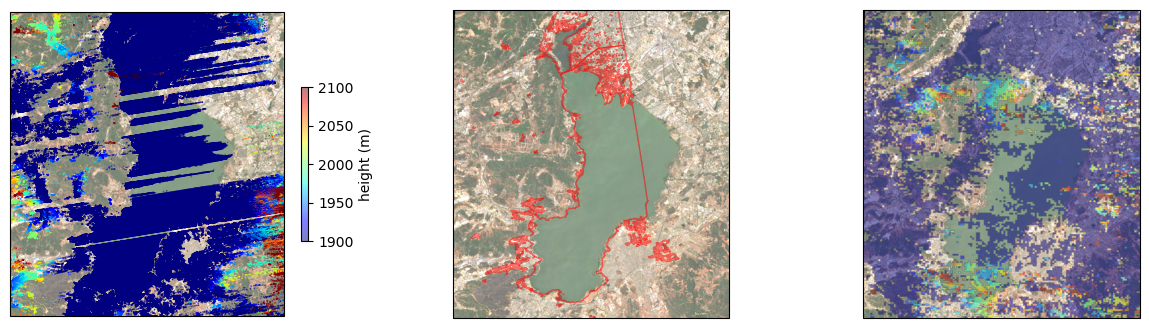

In [10]:
## Mask to get good water pixels
proj_wgs84 = ccrs.PlateCarree()
extent = [102.50, 102.85, 24.65, 25.04]  # [left, right, bottom, top]
fig, ax = plt.subplots(1, 3, figsize=(15, 4), subplot_kw={'projection': proj_wgs84})

### 1. pixel cloud data
ids_mask = np.where((pixc_nc.classification.values > 2) & (pixc_nc.geolocation_qual.values <= 64))[0]
scatter = ax[0].scatter(x=pixc_nc.longitude[ids_mask], y=pixc_nc.latitude[ids_mask], 
                     c=pixc_nc.height[ids_mask], cmap='jet', 
                     vmin=1900, vmax=2100, 
                     alpha=0.5, s=1, edgecolors='none')
show(src_dianchi_img, ax=ax[0], indexes=[3,2,1], percent_range=[5,95])
ax[0].set_extent(extent, crs=proj_wgs84)
fig.colorbar(scatter, ax=ax[0], shrink=0.5).set_label('height (m)')

### 2. lakesp data
lakesp_gpd_.plot(ax=ax[1], color='none', edgecolor='red', alpha=0.5)
show(src_dianchi_img, ax=ax[1], indexes=[3,2,1], percent_range=[5,95])
# ax[1].set_extent([102.50, 102.85, 24.65, 25.04], crs=proj_wgs84)
ax[1].set_extent(extent, crs=proj_wgs84)

### 3. raster data
left, right =  raster_nc['longitude'].min(), raster_nc['longitude'].max()
bottom, top = raster_nc['latitude'].min(), raster_nc['latitude'].max()
extent_data = [left, right, bottom, top]
show(src_dianchi_img, ax=ax[2], indexes=[3,2,1], percent_range=[5,95])
ax[2].imshow(raster_nc.wse,  extent=extent_data, cmap='jet', vmin=1900, vmax=2100, alpha=0.5)
# ax[2].set_extent([102.50, 102.85, 24.65, 25.04], crs=proj_wgs84)
ax[2].set_extent(extent, crs=proj_wgs84)


<!-- ##### 2. swot_l2_hr_raster data (to compare with pixc data.) -->
